# Part One - Question Based

#### Question 1: Please refer the table below to answer below questions: 

| Planned to purchase Product A  | Actually placed and order for Product A - Yes | Actually placed and order for Product A - No | Total |
| ------- | ---- | --------- | -------- |
| Yes | 400 | 100 | 500 |
| No | 200 | 1300 | 1500 |
| Total | 600 | 1400 | 2000 |


1. Refer to the above table and find the joint probability of the people who planned to purchase and actually 
placed an order.
2. Refer to the above table and find the joint probability of the people who planned to purchase and actually 
placed an order, given that people planned to purchase.

#### Answer 1:

In [1]:
# The above table is Contingency Table of Counts,
# so we can calculate joint, marginal and conditional probabilities using it.

# 1
# let P1 = Probability(plan to purchase AND actually place order) -- Joint Prob.
P1 = 400 / 2000
print(f'The prob of planning to purchase and actually place order is {P1}')

The prob of planning to purchase and actually place order is 0.2


In [2]:
# 2
# we know P(A given B) = P(A and B) / P(B)
# let P2 = Probability(plan to purchase AND actually place order) given people planned to purchase -- Conditional Prob.
P2 = 400 / 500
print(f'''The prob of planning to purchase and actually place order given the plan to 
purchase is {P2}''')

The prob of planning to purchase and actually place order given the plan to 
purchase is 0.8


#### Question 2: An electrical manufacturing company conducts quality checks at specified periods on the products it manufactures. Historically, the failure rate for the manufactured item is 5%. Suppose a random sample of 10 manufactured items is selected. Answer the following questions:
1. Probability that none of the items are defective?
2. Probability that exactly one of the items is defective?
3. Probability that two or fewer of the items are defective?
4. Probability that three or more of the items are defective ?

#### Answer 2:

In [3]:
# As the samples are random, independant, can be either defective or non-defective,
# with the prob. remaining constant throughout and the trials are fixed, thus satisfies 
# Bernoulli Process and follows a Binomial Distribution

In [4]:
# IMPORTING NECESSARY LIBRARIES
import numpy as np  # to form numpy arrays
from scipy.stats import binom # to perform the necessary Binomial distribution calculations

In [5]:
# Given data
arr = np.arange(0,4) # array to decide the prob mass function(PMF) over various random variables

p = 0.05 # prob of an item being defective

n = 10 # number of trials or sample size

In [6]:
binomial = binom.pmf(arr, n, p)
print(binomial)

[0.59873694 0.3151247  0.0746348  0.01047506]


In [7]:
# thus from above binomial PMF array we got

# 1
# let P1 = P(X=0)
P1 = binomial[0]
print('Probability that none of the items are defective is %f' % P1)

Probability that none of the items are defective is 0.598737


In [8]:
# 2
# let P2 = P(X=1)
P2 = binomial[1]
print('Probability that exactly one of the items is defective is %f' % P2)

Probability that exactly one of the items is defective is 0.315125


In [9]:
# 3
# let P3 = P(X<=2)
# this can be calculated in two ways:

# Adding all probabilities upto P(X<=2) = P(X=0) + P(X=1) + P(X=2)
P3 = binomial[0] + binomial[1] + binomial[2]
print('Probability that two or fewer of the items are defective is %f' % P3)

# other way is by calculating Cumulative Distribution Function(CDF)
# that sums up prob upto a random variable
binomial_cdf = binom.cdf(arr, n, p)
print('Probability that two or fewer of the items are defective using CDF is %f' %binomial_cdf[2])

Probability that two or fewer of the items are defective is 0.988496
Probability that two or fewer of the items are defective using CDF is 0.988496


In [10]:
# 4
# let P4 = P(X>=3) => 1 - P(X<=2) 
# Using the Complementary Prob
P4 = 1 - P3
print('Probability that three or more of the items are defective is %f' % P4)

Probability that three or more of the items are defective is 0.011504


#### Question 3: A car salesman sells on an average 3 cars per week. 
1. Probability that in a given week he will sell some cars.
2. Probability that in a given week he will sell 2 or more but less than 5 cars.
3. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per-week.

#### Answer 3

In [11]:
# from the above given statements, the problem at hand is a suitable candidate for 
# Poisson Distribution as the average rate of success is present and we are not very sure about
# how large the number of trials would be

In [12]:
# IMPORTING NECESSARY LIBRARIES
from scipy.stats import poisson # to perform the necessary Poisson distribution calculations
import matplotlib.pyplot as plt # to visualise the distribution
# NOTE: numpy has been loaded from above

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
# Given data
n = np.arange(0,16) # taking fairly large trials as compared to problem at hand

rate = 3 # refers to lambda -- the rate of success

In [15]:
# 1
# let P1 = P(X>=1) => 1 - P(X=0) -- prob some cars are sold
# using complementary prob
poisson_arr = poisson.pmf(n, rate)

P1 = 1 - poisson_arr[0]
print(f'Probability that in a given week he will sell some cars is %f'%P1)

Probability that in a given week he will sell some cars is 0.950213


In [16]:
# 2
# let P2 = P(X>=2 but less than 5)

# this can be calculated in two ways:

# Adding all probabilities P(X=2) + P(X=3) + P(X=4)
P2 = poisson_arr[2] + poisson_arr[3] + poisson_arr[4]
print('Probability that in a given week he will sell 2 or more but less than 5 cars is %f' % P2)

# other way is by calculating Cumulative Distribution Function(CDF)
# that sums up prob upto a random variable
# P(X<=4) - P(X<2)
poisson_cdf = poisson.cdf(n, rate)
print('Probability that in a given week he will sell 2 or more but less than 5 cars using CDF is %f' %(poisson_cdf[4] - poisson_cdf[1]))

Probability that in a given week he will sell 2 or more but less than 5 cars is 0.616115
Probability that in a given week he will sell 2 or more but less than 5 cars using CDF is 0.616115


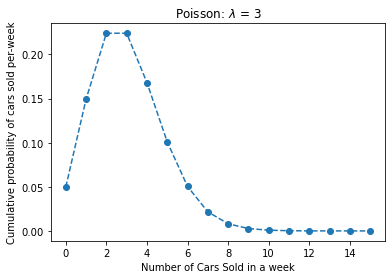

In [17]:
# 3
plt.plot(n,poisson_arr,'o--')
plt.title('Poisson: $\lambda$ = %i' % rate)
plt.xlabel('Number of Cars Sold in a week')
plt.ylabel('Cumulative probability of cars sold per-week')
plt.show()

#### Question 4: Accuracy in understanding orders for a speech based bot at a restaurant is important for the Company X which has designed, marketed and launched the product for a contactless delivery due to the COVID-19 pandemic. Recognition accuracy that measures the percentage of orders that are taken correctly is 86.8%. Suppose that you place order with the bot and two friends of yours independently place orders with the same bot. Answer the following questions:
1. What is the probability that all three orders will be recognised correctly?
2. What is the probability that none of the three orders will be recognised correctly?
4. What is the probability that at least two of the three orders will be recognised correctly?

#### Answer 4

In [18]:
# As the samples are random, independant, orders taken can be either correct or incorrect,
# with the prob. remaining constant throughout and the trials are fixed, thus satisfies 
# Bernoulli Process and follows a Binomial Distribution

In [19]:
# IMPORTING NECESSARY LIBRARIES
#NOTE: numpy and scipy.stats.binom are loaded already

In [20]:
# Given data
n = 3 # number of trials

k = np.arange(0,4) # get random variables

p = 0.868 # prob of taking order correctly

In [21]:
binomial = binom.pmf(k, n, p)  # the binomial distribution

In [22]:
# 1
print('Probability that all three orders will be recognised correctly is %f'%binomial[3])

Probability that all three orders will be recognised correctly is 0.653972


In [23]:
# 2
print('Probability that none of the three orders will be recognised correctly is %f'%binomial[0])

Probability that none of the three orders will be recognised correctly is 0.002300


In [24]:
# 3
# P(X>=2) = 1- P(X<2)
# this can be calculated in two ways:

# adding all probabilities from PMF
P1 = 1 - (binomial[0] + binomial[1])
print('Probability that at least two of the three orders will be recognised correctly is %f'%P1)

# or by calculating binomial CDF
binomial_cdf = binom.cdf(k, n, p)
print('Probability that at least two of the three orders will be recognised correctly using CDF is %f'%(1 - binomial_cdf[1]))

Probability that at least two of the three orders will be recognised correctly is 0.952328
Probability that at least two of the three orders will be recognised correctly using CDF is 0.952328


#### Question 5: A group of 300 professionals sat for a competitive exam. The results show the information of marks obtained by them have a mean of 60 and a standard deviation of 12. The pattern of marks follows a normal distribution. Answer the following questions:
1. What is the percentage of students who score more than 80.
2. What is the percentage of students who score less than 50.
3. What should be the distinction mark if the highest 10% of students are to be awarded distinction?

#### Answer 5

In [25]:
# IMPORTING THE NECESSARY LIBRARIES
from scipy.stats import norm # for manipulation of normal distributions

In [26]:
# Given data
# Normal Distribution
total_professionals = 300
mean_mu = 60
std_sigma = 12

In [27]:
# 1
# the calculations can be done in two ways:

# using Z-Score = X - mu/sigma
z = (80 - mean_mu) / std_sigma
# the CDF calculates area under the curve to the left of a point
p_value = 1 - norm.cdf(z)
print('Percentage of students who score more than 80 using Z-Score is %f'%(p_value*100))


# using original parameters with mean as loc, and std as scale
p_value = 1 - norm.cdf(80,loc=mean_mu,scale=std_sigma)
print('Percentage of students who score more than 80 using original values is %f'%(p_value*100))

Percentage of students who score more than 80 using Z-Score is 4.779035
Percentage of students who score more than 80 using original values is 4.779035


In [28]:
# 2
# the calculations can be done in two ways:

# using Z-Score = X - mu/sigma
z = (50 - mean_mu) / std_sigma
# the CDF calculates area under the curve to the left of a point
p_value = norm.cdf(z)
print('Percentage of students who score less than 50 using Z-Score is %f'%(p_value*100))

# using original parameters with mean as loc, and std as scale
p_value = norm.cdf(50,loc=mean_mu,scale=std_sigma)
print('Percentage of students who score less than 50 using original values is %f'%(p_value*100))

Percentage of students who score less than 50 using Z-Score is 20.232838
Percentage of students who score less than 50 using original values is 20.232838


#### This can also be achieved by directly looking at the Z-Table.

In [29]:
# 3
# looking on the Z-table in reverse direction.
# Given that max of 10% students can be given distinction.
# Thus, the area below the distinction mark should contain 90% data
# from Z-table 1.28 and 1.29 are the closest values to 0.9
# from formula of Z =X- mu/sigma
X = (1.28 * std_sigma) + mean_mu
print('The distinction mark if the highest 10%% of students are to be awarded distinction is approx %.2f'%X)

The distinction mark if the highest 10% of students are to be awarded distinction is approx 75.36


#### Question 6: Explain 1 real life industry scenario where you can use the concepts learnt in this module of Applied statistics to get a data driven business solution

#### Answer 6

1. Service based organisations can use `Binomial Distribution` concepts to get insights
about whether a customer likes their service or are dissatisfied.
2. Banks can used to track number of customers coming in during peak times using `Poisson Distribution`.
3. We can do Spam Filtering based on certain words given prior probabilities of spams and the words using `Bayes' Theorem`.

### ------------------------------------------------------------------------------------------------------------------------------------------------------

# Part Two - Project Based

### PROJECT OBJECTIVE: 
Company’s management wants to invest on proposal on managing some of the best 
teams in the league. The analytics department has been assigned with a task of creating a report on the 
performance shown by the teams. Some of the older teams are already in contract with competitors. Hence 
Company X wants to understand which teams they can approach which will be a deal win for them.

In [30]:
# Importing needed libraries
# NumPy and Matplotlib are already imported from above
import pandas as pd  # for manipulation of data sets
import seaborn as sns # for better visualisation

In [31]:
data_set = pd.read_csv('DS - Part2 - Basketball.csv')   # Read Data from CSV into data frame

In [32]:
data_set.head(10)  # confirm data is read by seeing first 10 rows of the data frame

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934-35,1
6,Team 7,82,2792,2626,948,608,1070,3609,3889,-,-,1929,3
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
8,Team 9,58,2109,1986,698,522,766,2683,2847,-,1,1939-40,2
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,-,1932-33,1


In [33]:
data_set.shape   # get rows and columns in the data

(61, 13)

In [34]:
data_set.info() # To see the data type of each of the variable and number of values entered in each of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


From `shape` and `info` we can conclude none of the rows are non-null, but there are rows with an information that doesn't fit the overall datatype of that feature.
Also, this can be seen below.

In [35]:
data_set.isnull().sum()   # no nulls, but there can be unexpected data still

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

In [36]:
data_set.describe(include='all')

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
count,61,61.000000,61,61,61,61,61,61,61,61,61,61,61.000000
unique,61,NaN,61,53,59,57,56,60,61,8,10,47,NaN
top,Team 12,NaN,606,30,8,44,37,70,116,-,-,1929,NaN
freq,1,NaN,1,3,2,2,3,2,1,52,48,10,NaN
mean,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.081967
std,NaN,26.827225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.276663
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
75%,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000


In [37]:
# from the data set describe we can see that some of the columns which could have been int are objects because of '-'
# present, which can be considered as bad data type.
# we will approach this by making a copy of our data set to keep original data intact
data_set_copy = data_set.copy()

#### Cleaning the data
- Replace the columns which could have been `int` but had other characters in them like `-` with zero.
- Change their data types to `int64`
- Make a consistent format for `TeamLaunch` by replacing `~, _, to` with `-`

In [38]:
data_set_copy.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [39]:
# changed `-` in each seemingly integer column to 0 and data type as int64 for ease of analysis
for column_name in data_set_copy.columns:
    if(column_name != 'Team' and column_name != 'Tournament' and column_name != 'TeamLaunch'):
        data_set_copy.loc[data_set_copy[data_set_copy[column_name] == '-'].index,column_name] = 0
        data_set_copy = data_set_copy.astype({column_name:'int64'})  

In [40]:
# making team launch consistent
def replace_with_hyphen(value):
    if 'to' in value:
        return value.replace('to', '-')
    elif '~' in value:
        return value.replace('~', '-')
    elif '_' in value:
        return value.replace('_', '-')
    return value

In [41]:
data_set_copy['TeamLaunch'] = data_set_copy['TeamLaunch'].apply(replace_with_hyphen)

In [42]:
data_set_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     int64 
 3   PlayedGames          61 non-null     int64 
 4   WonGames             61 non-null     int64 
 5   DrawnGames           61 non-null     int64 
 6   LostGames            61 non-null     int64 
 7   BasketScored         61 non-null     int64 
 8   BasketGiven          61 non-null     int64 
 9   TournamentChampion   61 non-null     int64 
 10  Runner-up            61 non-null     int64 
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(11), object(2)
memory usage: 6.3+ KB


In [43]:
# now if we do a describe on the DF we can see the statistics for all relevant columns
data_set_copy.describe(include='all')

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
count,61,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61,61.000000
unique,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,NaN
top,Team 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1929,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
mean,NaN,24.000000,901.426230,796.819672,303.967213,188.934426,303.754098,1140.344262,1140.229508,1.426230,1.409836,NaN,7.081967
std,NaN,26.827225,1134.899121,876.282765,406.991030,201.799477,294.708594,1506.740211,1163.710766,5.472535,4.540107,NaN,5.276663
min,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000
25%,NaN,4.000000,96.000000,114.000000,34.000000,24.000000,62.000000,153.000000,221.000000,0.000000,0.000000,NaN,3.000000
50%,NaN,12.000000,375.000000,423.000000,123.000000,95.000000,197.000000,430.000000,632.000000,0.000000,0.000000,NaN,6.000000
75%,NaN,38.000000,1351.000000,1318.000000,426.000000,330.000000,563.000000,1642.000000,1951.000000,0.000000,0.000000,NaN,10.000000


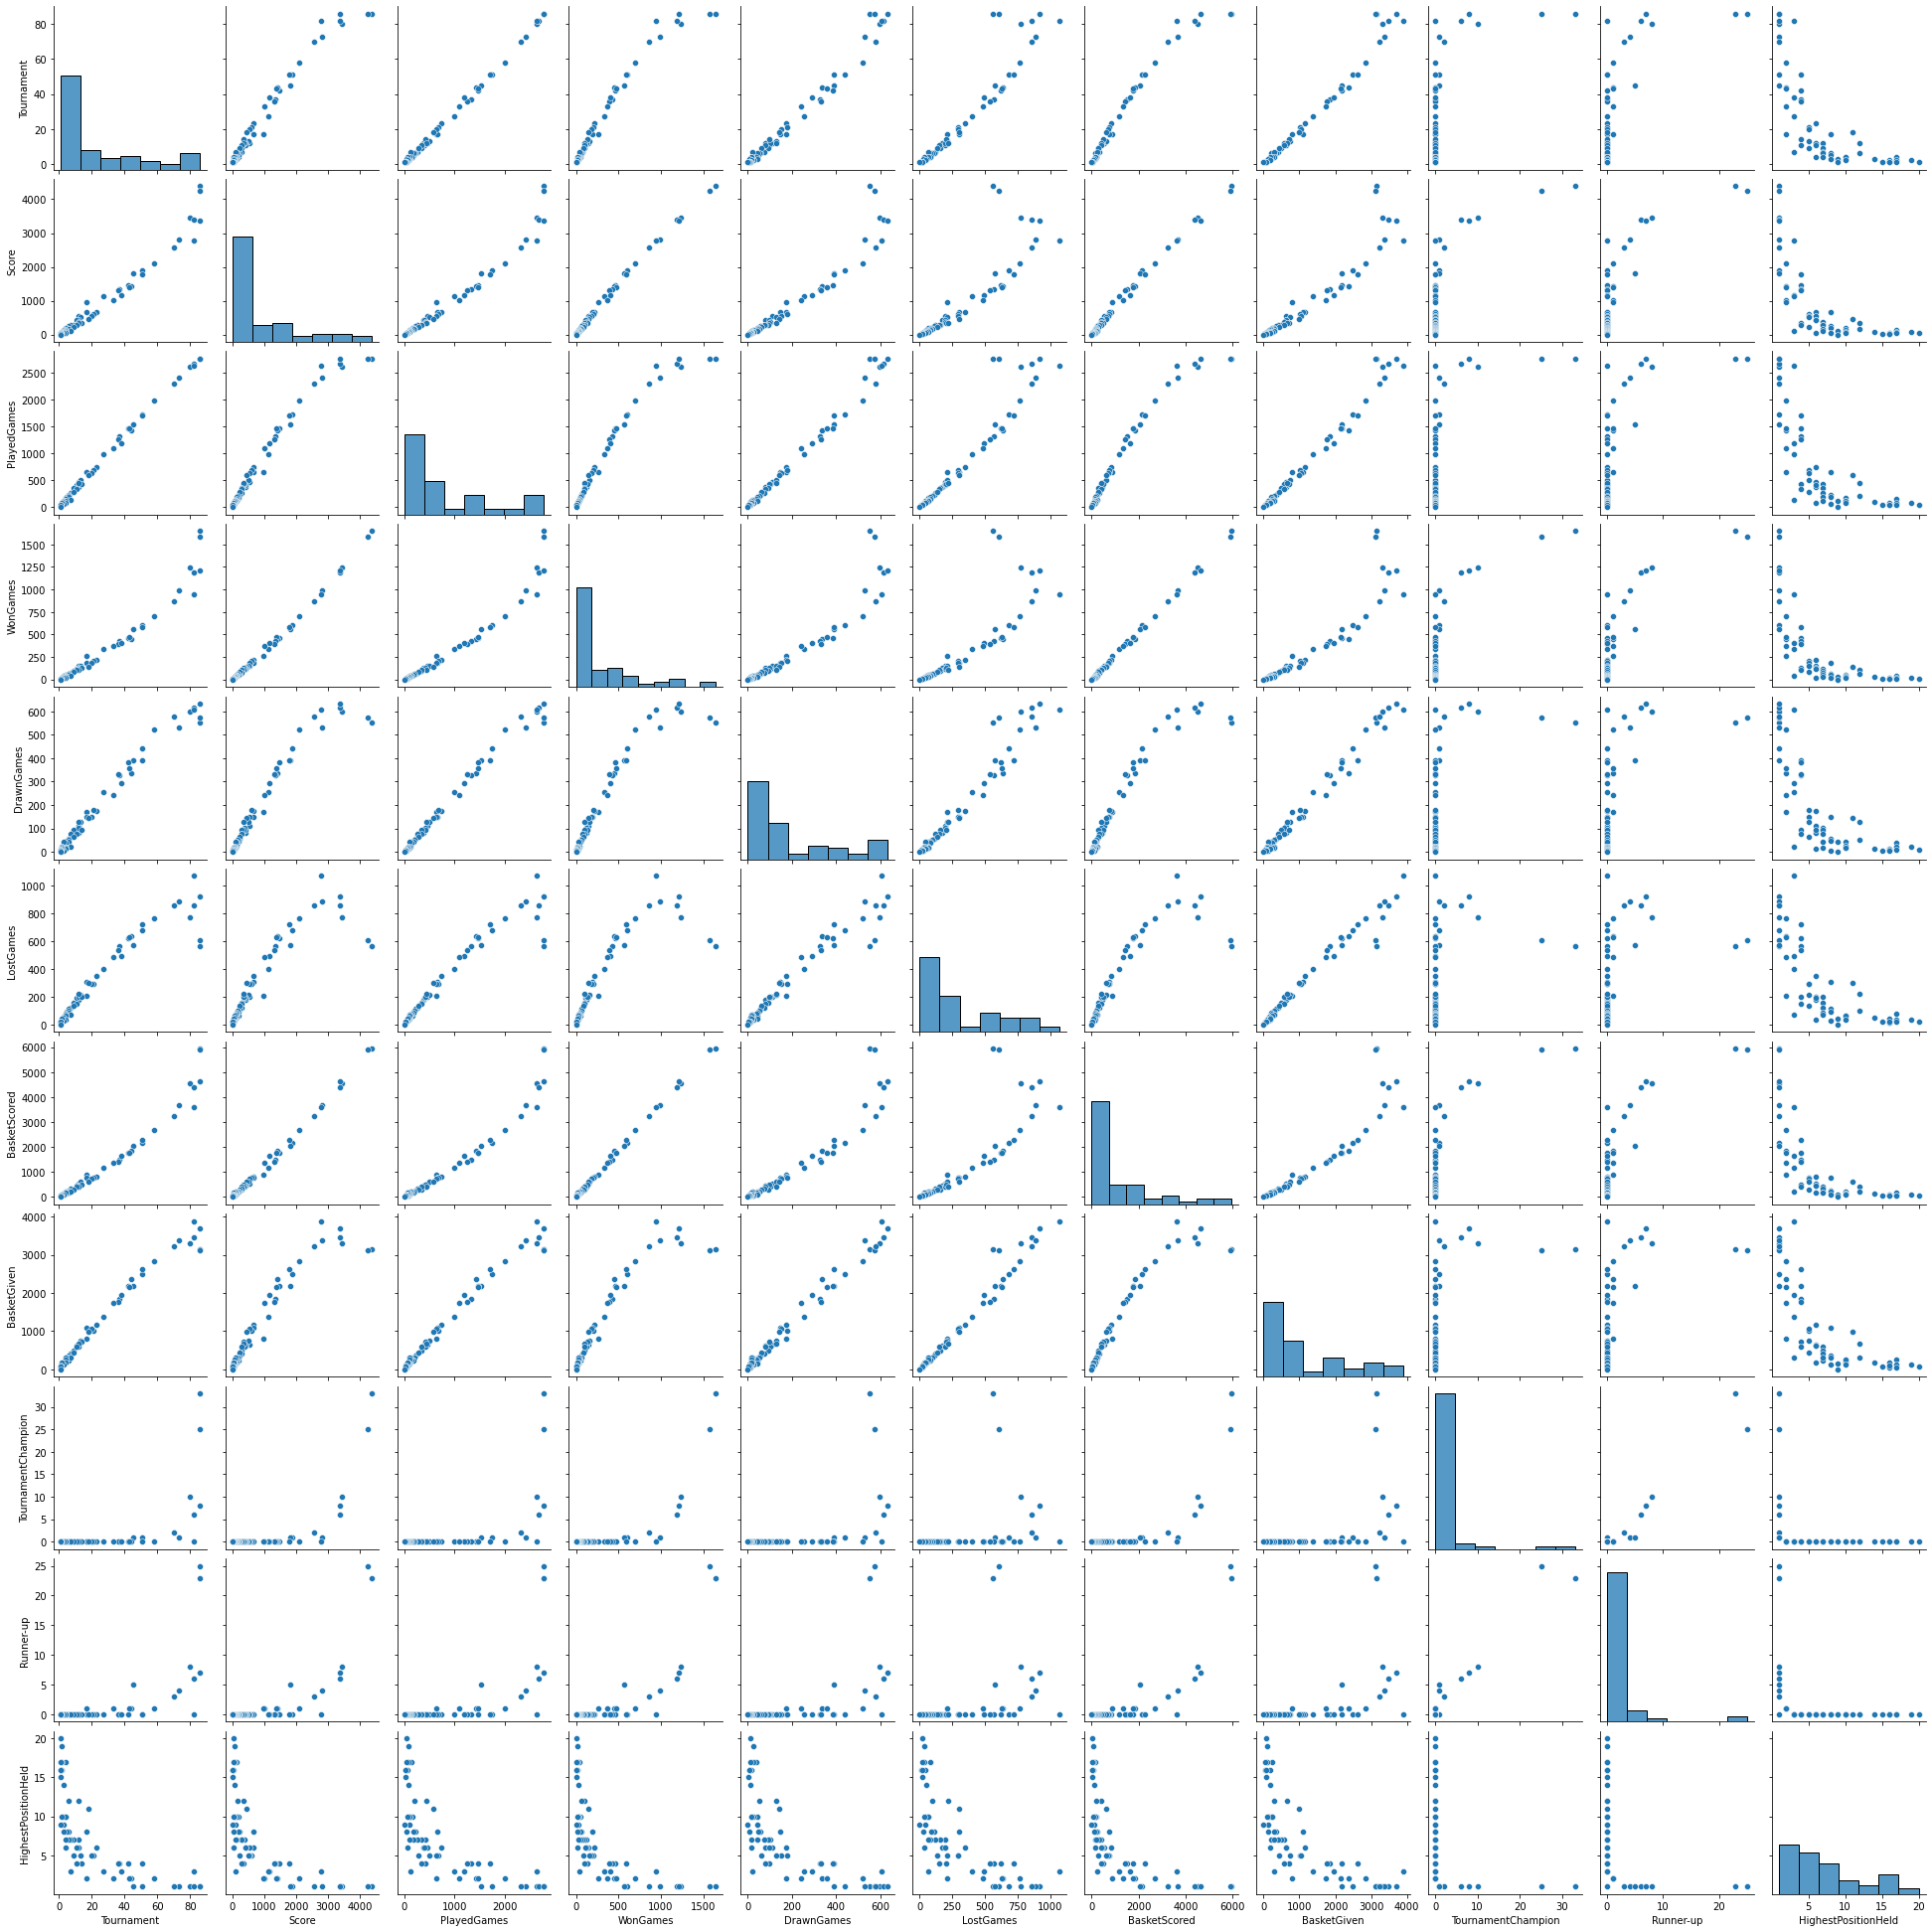

In [44]:
sns.pairplot(data=data_set_copy)
plt.show()

#### From the `pairplot` obvious things can be observed like:
- Teams which have played more games have higher score.
- Teams which have played more tournaments have won or been in runner-up more.
- Teams ehich have played more, have scored and conceded more baskets.

The above statements can also be seen by correlation between various elements in the data set

In [45]:
data_corr = data_set_copy.corr()
data_corr

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,HighestPositionHeld
Tournament,1.000000,0.981441,0.998677,0.971954,0.989387,0.949863,0.975059,0.987828,0.589072,0.645876,-0.708071
Score,0.981441,1.000000,0.979824,0.997240,0.958452,0.880040,0.996656,0.944263,0.714280,0.764278,-0.669775
PlayedGames,0.998677,0.979824,1.000000,0.967641,0.994053,0.956503,0.970127,0.990129,0.574716,0.632921,-0.710876
WonGames,0.971954,0.997240,0.967641,1.000000,0.939844,0.852785,0.999318,0.926234,0.752204,0.797350,-0.648628
DrawnGames,0.989387,0.958452,0.994053,0.939844,1.000000,0.973156,0.942668,0.992579,0.503472,0.566269,-0.719845
LostGames,0.949863,0.880040,0.956503,0.852785,0.973156,1.000000,0.859169,0.985275,0.325462,0.393211,-0.725149
BasketScored,0.975059,0.996656,0.970127,0.999318,0.942668,0.859169,1.000000,0.931548,0.743144,0.790532,-0.649455
BasketGiven,0.987828,0.944263,0.990129,0.926234,0.992579,0.985275,0.931548,1.000000,0.471824,0.533814,-0.726610
TournamentChampion,0.589072,0.714280,0.574716,0.752204,0.503472,0.325462,0.743144,0.471824,1.000000,0.971552,-0.305397
Runner-up,0.645876,0.764278,0.632921,0.797350,0.566269,0.393211,0.790532,0.533814,0.971552,1.000000,-0.360408


This can be visualised by plotting a HeatMap

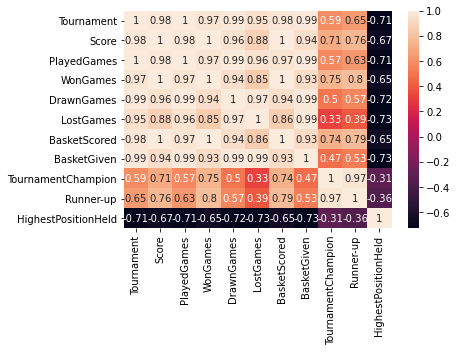

In [46]:
sns.heatmap(data=data_corr,annot=True)
plt.show()

From the `heat map` and the `correlation table` it can be observed that:
- `Tournament` played has high correlation with `Score`,`PlayedGames`,`WonGames`,`DrawnGames`,`LostGames`,`BasketScored`,`BasketGiven`.
- Similar holds for the `PlayedGames`

In [47]:
print('The team with the highest score')
data_set_copy[data_set_copy['Score'] == data_set_copy['Score'].max()]

The team with the highest score


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1


In [48]:
print('The teams which have been launched earliest')
data_set_copy[data_set_copy['TeamLaunch'] == data_set_copy['TeamLaunch'].sort_values(ascending=True)[0]]

The teams which have been launched earliest


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
13,Team 14,44,1416,1428,453,336,639,1843,2368,0,1,1929,2
44,Team 45,7,107,130,43,21,66,227,308,0,0,1929,3
51,Team 52,4,56,72,21,14,37,153,184,0,0,1929,6
53,Team 54,3,42,54,18,6,30,97,131,0,0,1929,8


In [49]:
print('The team with highest baskets scored')
data_set_copy[data_set_copy['BasketScored']==data_set_copy['BasketScored'].max()]

The team with highest baskets scored


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1


In [50]:
print('Tournament winning percentage of each team')
tournament_win_percentage = (data_set_copy['TournamentChampion'] / data_set_copy['Tournament'])*100
tournament_win_percentage

Tournament winning percentage of each team


0     38.372093
1     29.069767
2     12.500000
3      7.317073
4      9.302326
        ...    
56     0.000000
57     0.000000
58     0.000000
59     0.000000
60     0.000000
Length: 61, dtype: float64

In [51]:
print('Game winning percentage of each team')
game_win_percentage = (data_set_copy['WonGames'] / data_set_copy['PlayedGames'])*100
game_win_percentage

Game winning percentage of each team


0     59.630702
1     57.241130
2     47.475134
3     44.557057
4     43.772629
        ...    
56    21.052632
57    23.333333
58    23.333333
59    16.666667
60          NaN
Length: 61, dtype: float64

In [52]:
print('Game losing percentage of each team')
game_loose_percentage = (data_set_copy['LostGames'] / data_set_copy['PlayedGames'])*100
game_loose_percentage

Game losing percentage of each team


0     20.383780
1     22.013034
2     29.648049
3     32.319820
4     33.309196
        ...    
56    52.631579
57    50.000000
58    60.000000
59    70.000000
60          NaN
Length: 61, dtype: float64

So while selecting the teams for approaching we can keep these things in mind:

1. Approach teams which are older than certain period like at-least 20 years old.

but the only hindrance in this would be the teams that are oldest would have already contractor companies, so it would be a very high competition and deal negotiation.

In [53]:
print('Teams that are at-least 20 years old')
from datetime import datetime
teams_more_than_20 = data_set_copy['TeamLaunch'].apply(lambda value: (datetime.now() - datetime.strptime(value[:4],'%Y')).days/365)
data_set_copy[teams_more_than_20>=20]

Teams that are at-least 20 years old


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931-32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934-35,1
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939-40,2
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932-33,1


2. We can also approach teams that have high percentage of winning, like around atleast 35% winning rate

In [54]:
data_set_copy.iloc[game_win_percentage[game_win_percentage>=35].index]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931-32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934-35,1
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939-40,2
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932-33,1


3. We can also approach teams that have low percentage of losing, like around atmax 35% loosing rate

In [55]:
data_set_copy.iloc[game_loose_percentage[game_loose_percentage<=35].index]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931-32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
20,Team 21,17,970,646,266,172,208,892,789,0,1,1998-99,2


We can also combine many conditions like teams which are older than at-least 20 years and winning percentage of atleast 35% for approaching a team for deal.

The data set provided needed a fair bit of cleaning becaus of presence of unexpected values in various columns.

Also, the data set could have details about the contracts that the teams are present in already, and based on that we could see if you can fit that team in our budget. We could also have details about the managing costs that the teams require. 
Based on this we could have a look at our budget and split where to put the money in.

### ------------------------------------------------------------------------------------------------------------------------------------------------------

# Part Three - Project Based

### PROJECT OBJECTIVE:
Analyse the data of the various companies from the given dataset and perform the tasks that are specified in the below steps. Draw insights from the various attributes that are present in the dataset, plot distributions, state hypotheses and draw conclusions from the dataset.

In [56]:
# Importing needed libraries
# Pandas,Seaborn, Matplotlib are already imported from above
# other will be imported as an when needed

#### Data Warehouse

In [57]:
company_data = pd.read_csv('DS - Part3 - CompanyX_EU.csv') # readind the csv file

In [58]:
company_data.head(10)  # confirm data is read by seeing first 10 rows of the data frame

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating
7,8020 Media,8020media.com,NaN,TC40 2007,Contestant,Operating
8,About Last Night,aboutlastnight.net,NaN,Disrupt NYC 2012,Contestant,Operating
9,Adgregate Markets,adgregate.com,NaN,TC50 2008,Contestant,Operating


In [59]:
company_data.shape   # get rows and columns in the data

(662, 6)

In [60]:
company_data.info() # To see the data type of each of the variable and number of values entered in each of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


#### Data Exploration

In [61]:
company_data.dtypes    # checking for data types

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object

In [62]:
# from info and shape we can see there are many rows that contain null values
company_data.isna().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

Thus we have null values in `Funding` and `Product`. If we want to do analysis on it, we drop the null values.
But we do that on a copy of the original data set

In [63]:
company_data_copy = company_data.copy()  # making a copy of the data set

#### Data Pre-Processing & Visualisation

In [64]:
company_data_copy.dropna(inplace=True) # drop the null values

In [65]:
def convert_to_funds_in_million(fund):
    '''
    Converts the supplied fund from object to float.
    If the suffix is Billion, we multiply by 1000
    If suffix is Thousands(K), we divide by 1000
    else we return the fund as such
    '''
    if fund[-1].upper() == 'B':
        return float(fund[1:-1]) * 1000
    elif fund[-1].upper() == 'K':
        return float(fund[1:-1]) / 1000
    else:
        return float(fund[1:-1])

In [96]:
set1={}
print(company_data_copy['Funding'].apply(lambda fund: set1.add(fund[-1]))

SyntaxError: unexpected EOF while parsing (<ipython-input-96-f77b1eb8dbd7>, line 2)

In [66]:
#convert funding to a numerical value
company_data_copy['Funds_in_Million'] = company_data_copy['Funding'].apply(convert_to_funds_in_million)

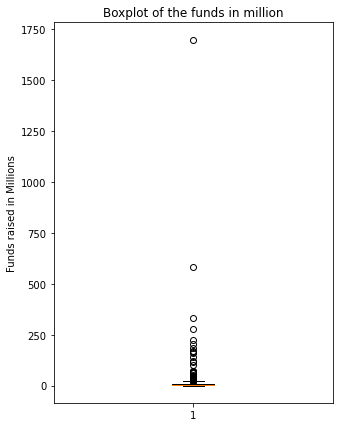

In [67]:
plt.figure(figsize=(5,7))
plot = plt.boxplot(company_data_copy['Funds_in_Million']) # store to extract data from it
plt.title('Boxplot of the funds in million')
plt.ylabel("Funds raised in Millions")

plt.show()

In [68]:
print('The lower fence from box plot is %f'%plot['caps'][0].get_data()[1][1])

The lower fence from box plot is 0.005000


In [69]:
upper_fence = plot['caps'][1].get_data()[1][1]
print('The upper fence from box plot is %f'%upper_fence)

The upper fence from box plot is 22.000000


In [70]:
number_more_than_upper_fence = len(company_data_copy[company_data_copy['Funds_in_Million'] > upper_fence])
print('Number of outliers greater than upper fence is %i'%number_more_than_upper_fence)

Number of outliers greater than upper fence is 60


In [71]:
#dropping values greater than upper fence
company_data_copy.drop(company_data_copy[company_data_copy['Funds_in_Million'] > upper_fence].index,inplace=True)  

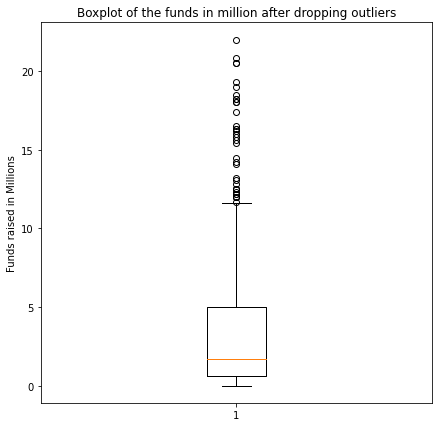

In [72]:
# Plotting box plot after dropping the values
plt.figure(figsize=(7,7))
plt.boxplot(company_data_copy['Funds_in_Million'])
plt.title('Boxplot of the funds in million after dropping outliers')
plt.ylabel("Funds raised in Millions")

plt.show()

In [73]:
print('Frequency of Operating State')
company_data_copy['OperatingState'].value_counts().to_frame().T

Frequency of Operating State


,Operating,Closed,Acquired
OperatingState,275,56,55


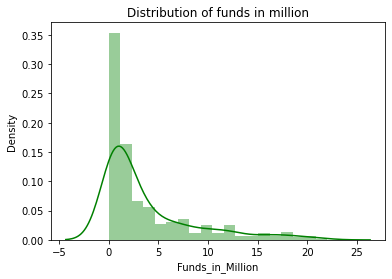

In [74]:
sns.distplot(company_data_copy['Funds_in_Million'],kde=True,color='g')
plt.title('Distribution of funds in million')
plt.show()

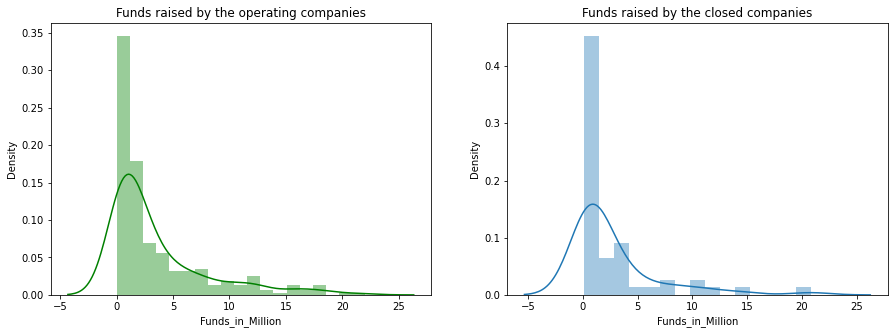

In [75]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.distplot(company_data_copy.loc[company_data_copy['OperatingState'] == 'Operating', 'Funds_in_Million'], ax = ax[0],color='g')
sns.distplot(company_data_copy.loc[company_data_copy['OperatingState'] == 'Closed', 'Funds_in_Million'], ax = ax[1])

ax[0].set_title('Funds raised by the operating companies')
ax[1].set_title('Funds raised by the closed companies')
plt.show()

#### Statistical Analysis

In [76]:
# NOTE:: for all statistical analysis we will use the significance level of 95%
alpha = 0.05

##### Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?

- `Null Hypothesis, H0`: there is no significant difference between mean of funds raised by operating companies and closed companies
- `Alternate Hypothesis, H1`: there is significant difference between mean of funds raised by operating companies and closed companies

As we are not sure about the distribution and standard deviation of the population and the samples are not related to each other we may use
`independant t-test`

In [77]:
# import necessary libraries
from scipy.stats import ttest_ind

# creating samples
sample1 = company_data_copy.loc[company_data_copy['OperatingState'] == 'Operating', 'Funds_in_Million']
sample2 = company_data_copy.loc[company_data_copy.OperatingState =='Closed', 'Funds_in_Million']

#performing the test
t_stat, p_value = ttest_ind(sample1, sample2)

#comapring values with alpha to arrive at a conclusion
if p_value <= alpha:
    print(f'Since the p-value, {round(p_value,4)} < {alpha} (alpha) we reject the Null hypothesis.')
    print('There is significant difference between mean of funds raised by operating companies and closed companies.')
else:
    print(f'Since the p-value, {round(p_value,4)} > {alpha} (alpha) we fail to reject the Null hypothesis.')
    print('There is no significant difference between mean of funds raised by operating companies and closed companies.')

Since the p-value, 0.1932 > 0.05 (alpha) we fail to reject the Null hypothesis.
There is no significant difference between mean of funds raised by operating companies and closed companies.


As we have a sample size > 30, we can safely use `Central Limit Theorem` and assume population to be `Normal`and use `two sample Z-test`

In [78]:
# import necessary libraries
from statsmodels.stats.weightstats import ztest

# creating samples
# use the samples from above

#performing the test
t_stat, p_value = ztest(sample1, sample2)

#comapring values with alpha to arrive at a conclusion
if p_value <= alpha:
    print(f'Since the p-value, {round(p_value,4)} < {alpha} (alpha) we reject the Null hypothesis.')
    print('There is significant difference between mean of funds raised by operating companies and closed companies.')
else:
    print(f'Since the p-value, {round(p_value,4)} > {alpha} (alpha) we fail to reject the Null hypothesis.')
    print('There is no significant difference between mean of funds raised by operating companies and closed companies.')

Since the p-value, 0.1923 > 0.05 (alpha) we fail to reject the Null hypothesis.
There is no significant difference between mean of funds raised by operating companies and closed companies.


##### Inference
Inference from the above tests is that, the Operating State is not affected by the Funds raised by the company, because there is no significant difference in the funds raised by operating companies and closed companies.

### Task

In [79]:
# copy original data
company_data_copy_1 = company_data.copy()

In [80]:
# frequency ditribution of Result of Companies as Winners and Contestants
print('Frequency of ')
value_counts = company_data_copy_1['Result'].value_counts()
print(value_counts)

Frequency of 
Contestant         488
Finalist            84
Audience choice     41
Winner              26
Runner up           23
Name: Result, dtype: int64


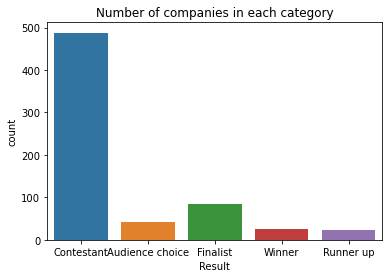

In [81]:
sns.countplot(x='Result',data=company_data_copy_1)
plt.title('Number of companies in each category')
plt.show()

In [82]:
contestant_count = value_counts['Contestant']
winner_count = value_counts[1:].sum()

In [83]:
operating_contestant_count = company_data_copy_1['OperatingState'][company_data_copy_1['Result'] == 'Contestant'].value_counts().loc['Operating']
operating_winner_count = company_data_copy_1['OperatingState'][company_data_copy_1['Result'] != 'Contestant'].value_counts().loc['Operating']

In [84]:
print(operating_winner_count/winner_count,operating_contestant_count/contestant_count)

0.764367816091954 0.680327868852459


##### Research Problem
There is some difference between the proportion operational companies in the two categories.

##### Framing Null and Alternate Hypothesis
`Null hyputhesis (Ho)`: The proportion of companies that are operating is the same in both categories - winners and contestants

`Alternative hypothesis (Ha)`: The proportion of companies that are operating is significantly different from each other, among the two categories

#### Deciding the significance level
alpha = 0.05

##### Selecting the test to perform
- Z-test for proportions

In [85]:
# Z-Test for proportions

# IMPORTING NECESSARY LIBRARIES
from statsmodels.stats.proportion import proportions_ztest

# creating samples
# use the samples from above

#performing the test
z_stat, p_value = proportions_ztest([operating_contestant_count,operating_winner_count],[contestant_count,winner_count])

#comapring values with alpha to arrive at a conclusion
if p_value <= alpha:
    print(f'Since the p-value, {round(p_value,4)} < {alpha} (alpha) we reject the Null hypothesis.')
    print('The proportion of companies that are operating is significantly different from each other, among the two categories.')
else:
    print(f'Since the p-value, {round(p_value,4)} > {alpha} (alpha) we fail to reject the Null hypothesis.')
    print('The proportion of companies that are operating is the same in both categories - winners and contestants.')

Since the p-value, 0.0374 < 0.05 (alpha) we reject the Null hypothesis.
The proportion of companies that are operating is significantly different from each other, among the two categories.


#### Inference
Proportion of operating companies that become winners is more than operating companies that are contestatnts.

#### Check distribution of the `Event` variable

In [86]:
company_data_copy['Event'].value_counts() # frequency of whole feature

TC50 2008                    25
TC40 2007                    22
Disrupt NY 2015              21
Disrupt SF 2014              19
Disrupt SF 2013              19
Disrupt NYC 2012             19
TC50 2009                    19
Disrupt SF 2011              19
Disrupt SF 2015              19
Disrupt NYC 2013             19
Disrupt SF 2016              17
Disrupt NY 2016              16
Disrupt NYC 2011             15
Disrupt NYC 2014             15
Disrupt SF 2012              15
Disrupt SF 2010              13
Hardware Battlefield 2014    12
Hardware Battlefield 2016    12
Disrupt London 2015          11
Disrupt NYC 2010             10
Disrupt EU 2014              10
Disrupt London 2016          10
Hardware Battlefield 2015    10
Disrupt EU 2013               9
-                             6
Disrupt Beijing 2011          4
Name: Event, dtype: int64

In [87]:
# frequency of Event which has Disrupt
company_data_copy[company_data_copy['Event'].apply(lambda value:'disrupt' in value.lower())]['Event'].value_counts()

Disrupt NY 2015         21
Disrupt NYC 2013        19
Disrupt NYC 2012        19
Disrupt SF 2011         19
Disrupt SF 2015         19
Disrupt SF 2013         19
Disrupt SF 2014         19
Disrupt SF 2016         17
Disrupt NY 2016         16
Disrupt SF 2012         15
Disrupt NYC 2011        15
Disrupt NYC 2014        15
Disrupt SF 2010         13
Disrupt London 2015     11
Disrupt NYC 2010        10
Disrupt London 2016     10
Disrupt EU 2014         10
Disrupt EU 2013          9
Disrupt Beijing 2011     4
Name: Event, dtype: int64

In [88]:
# frequency of Event which has Disrupt 2013 onwards
disrupt_events_from_2013 = company_data_copy[company_data_copy['Event'].apply(lambda value:'disrupt' in value.lower() and int(value[-4:]) >= 2013)]['Event']
disrupt_events_from_2013.value_counts()

Disrupt NY 2015        21
Disrupt SF 2014        19
Disrupt SF 2013        19
Disrupt SF 2015        19
Disrupt NYC 2013       19
Disrupt SF 2016        17
Disrupt NY 2016        16
Disrupt NYC 2014       15
Disrupt London 2015    11
Disrupt London 2016    10
Disrupt EU 2014        10
Disrupt EU 2013         9
Name: Event, dtype: int64

##### Research Problem
Comparison of funds raisedby companies across NY, SF, EU events from 2013

##### Framing Null and Alternate Hypothesis
`Null hyputhesis (Ho)`: Average funds raised by companies across three regions are the same

`Alternative hypothesis (Ha)`: Average funds raised by companies across three regions are different

#### Deciding the significance level
alpha = 0.05

##### Selecting the test to perform
- `ANOVA` as we more than two sample sets and we need to check equality of `mean`

In [89]:
disrupt_events_from_2013

1         Disrupt NYC 2013
3          Disrupt NY 2016
13         Disrupt SF 2015
14     Disrupt London 2016
16         Disrupt SF 2015
              ...         
635        Disrupt NY 2015
641       Disrupt NYC 2013
642        Disrupt SF 2014
646    Disrupt London 2015
660        Disrupt SF 2013
Name: Event, Length: 185, dtype: object

In [90]:
# creating samples
NY_NYC_events = company_data_copy.loc[disrupt_events_from_2013[disrupt_events_from_2013.apply(lambda value:value[8:-5].upper() == 'NYC' or value[8:-5].upper() == 'NY')].index, 'Funds_in_Million']
SF_events = company_data_copy.loc[disrupt_events_from_2013[disrupt_events_from_2013.apply(lambda value: value[8:-5].upper() == 'SF')].index,'Funds_in_Million']
EU_events = company_data_copy.loc[disrupt_events_from_2013[disrupt_events_from_2013.apply(lambda value: value[8:-5].upper() == 'EU' or value[8:-5].upper() == 'LONDON')].index,'Funds_in_Million']

In [91]:
# one-way ANOVA

# IMPORTING NECESSARY LIBRARIES
from scipy.stats import f_oneway

#performing the test
stat, p_value = f_oneway(NY_NYC_events,SF_events,EU_events)

#comapring values with alpha to arrive at a conclusion
if p_value <= alpha:
    print(f'Since the p-value, {round(p_value,4)} < {alpha} (alpha) we reject the Null hypothesis.')
    print('Average funds raised by companies across three regions are different.')
else:
    print(f'Since the p-value, {round(p_value,4)} > {alpha} (alpha) we fail to reject the Null hypothesis.')
    print('Average funds raised by companies across three regions are the same.')

Since the p-value, 0.6284 > 0.05 (alpha) we fail to reject the Null hypothesis.
Average funds raised by companies across three regions are the same.


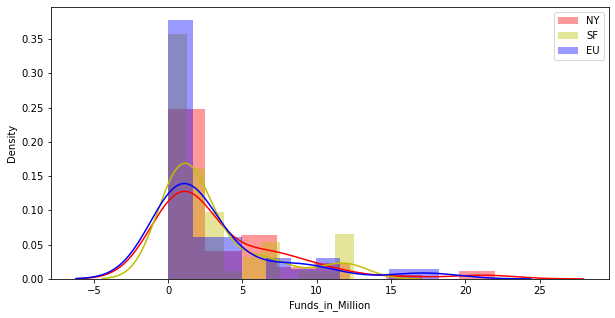

In [92]:
plt.figure(figsize=(10,5))
sns.distplot(NY_NYC_events, color = 'r', label = 'NY')
sns.distplot(SF_events, color = 'y', label = 'SF')
sns.distplot(EU_events, color = 'b', label = 'EU')
plt.legend()
plt.show()

##### Inference
- From test we can infer that the raising of funds doesn't depend on the region of location.
- From the graph this can also be seen that the mean of the graphs seems same and the distribution also is similar 

The data set was pretty complete in terms volume and quality to perform the asked data analysis.
This could have also been extended by mentioning about the strtup amount used, number of products sold, customer feedback and all to decide on the footfalls which led to the closing of the companies. We can also have seen many events and decided winners among those and not only on one event.